In [1]:
#  import các thư viện và module cần thiết trong Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv("C:\\Users\\6\\PycharmProjects\\baitaplon\\Clean_Dataset.csv")

In [3]:
# Kiểm tra kích thước của dataframe
print("Kích thước của dataframe:", df.shape)


Kích thước của dataframe: (300153, 12)


In [4]:
# Kiểm tra các giá trị thiếu trong dataframe
print("Số lượng giá trị thiếu trong từng cột:")
print(df.isna().sum())

Số lượng giá trị thiếu trong từng cột:
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


Text(0.5, 1.0, 'Các giá trị thiếu trong dataframe')

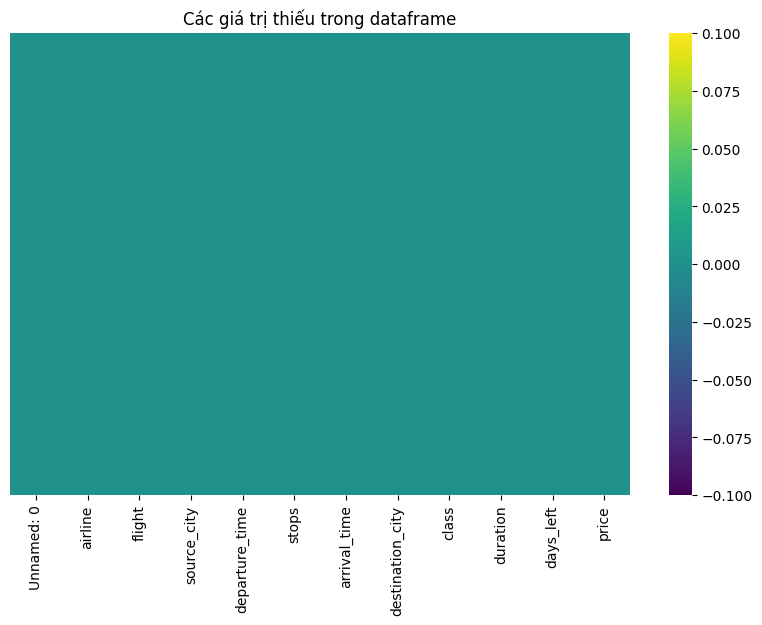

In [5]:
# Vẽ biểu đồ heatmap để hiển thị các giá trị thiếu
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")
plt.title("Các giá trị thiếu trong dataframe")

In [6]:
# Xóa các cột không cần thiết
df.drop(["Unnamed: 0", "flight"], axis=1, inplace=True)

Text(0.5, 1.0, 'Số lượng chuyến bay của từng hãng hàng không')

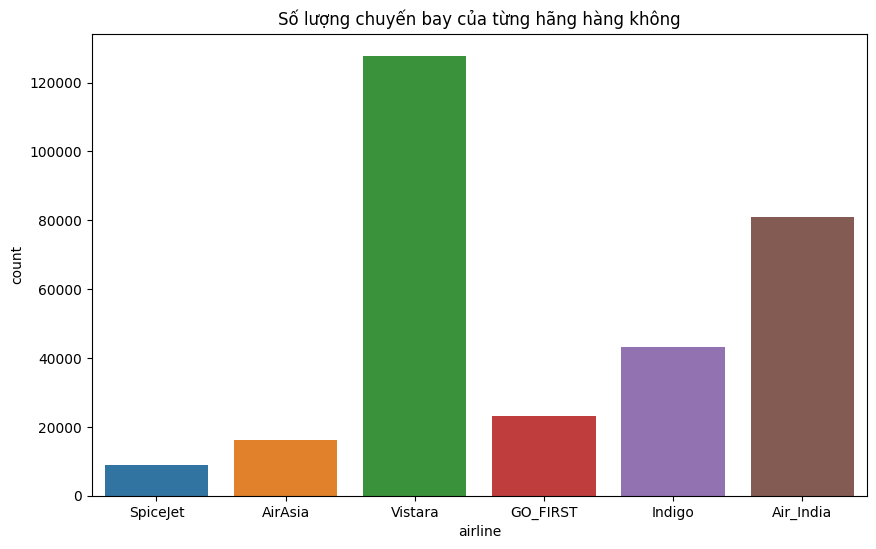

In [7]:
# Hiển thị số lượng chuyến bay của từng hãng hàng không
plt.figure(figsize=(10, 6))
sns.countplot(x="airline", data=df)
plt.title("Số lượng chuyến bay của từng hãng hàng không")

Text(0.5, 1.0, 'Giá vé theo từng hãng hàng không')

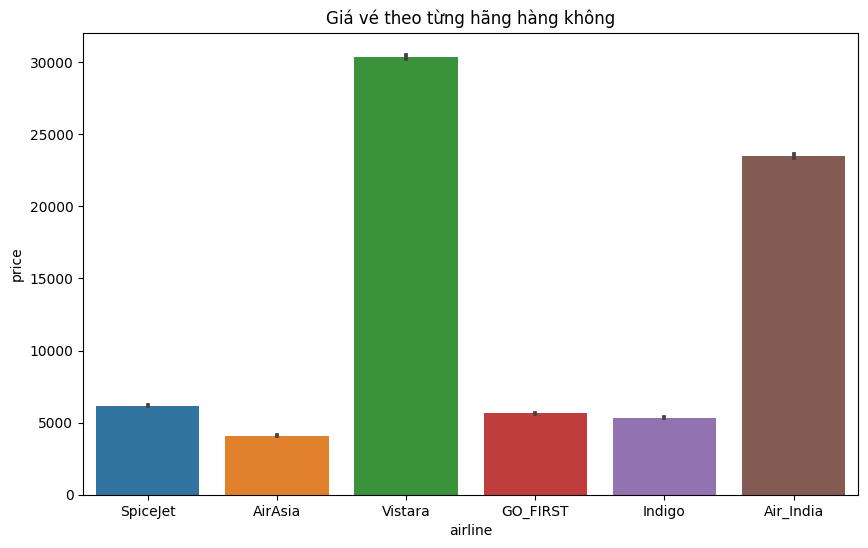

In [8]:
# Vẽ biểu đồ barplot hiển thị giá vé theo từng hãng hàng không
plt.figure(figsize=(10, 6))
sns.barplot(x="airline", y="price", data=df)
plt.title("Giá vé theo từng hãng hàng không")

In [9]:
# Chuyển đổi biến hạng mục thành biến số bằng phương pháp One-Hot Encoding
df_encoded = pd.get_dummies(df)

In [10]:
# Loại bỏ các cột không cần thiết
cols_to_drop = ["airline_AirAsia", "source_city_Bangalore", "departure_time_Afternoon", "stops_one", "arrival_time_Afternoon", "destination_city_Bangalore", "class_Business"]
df_encoded.drop(cols_to_drop, axis=1, inplace=True)

In [11]:
# Chia thành input (x) và output (y)
x = df_encoded.drop(["price"], axis=1).values
y = df_encoded["price"].values

In [12]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
# Chia dữ liệu thành tập train và tập test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [14]:
# Xây dựng mô hình hồi quy tuyến tính
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
# Dự đoán giá vé trên tập test
y_pred = lr.predict(x_test)

In [16]:
# Đánh giá mô hình sử dụng R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.9120895441788929


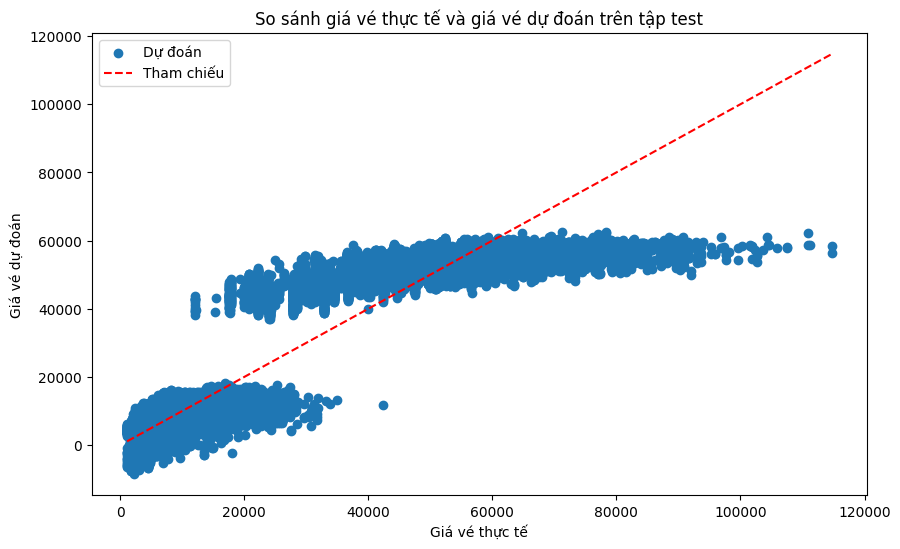

In [18]:
# Vẽ biểu đồ so sánh giá vé dự đoán và giá vé thực tế trên tập test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Dự đoán')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Tham chiếu')
plt.xlabel('Giá vé thực tế')
plt.ylabel('Giá vé dự đoán')
plt.title('So sánh giá vé thực tế và giá vé dự đoán trên tập test')
plt.legend()

# Hiển thị biểu đồ
plt.show()

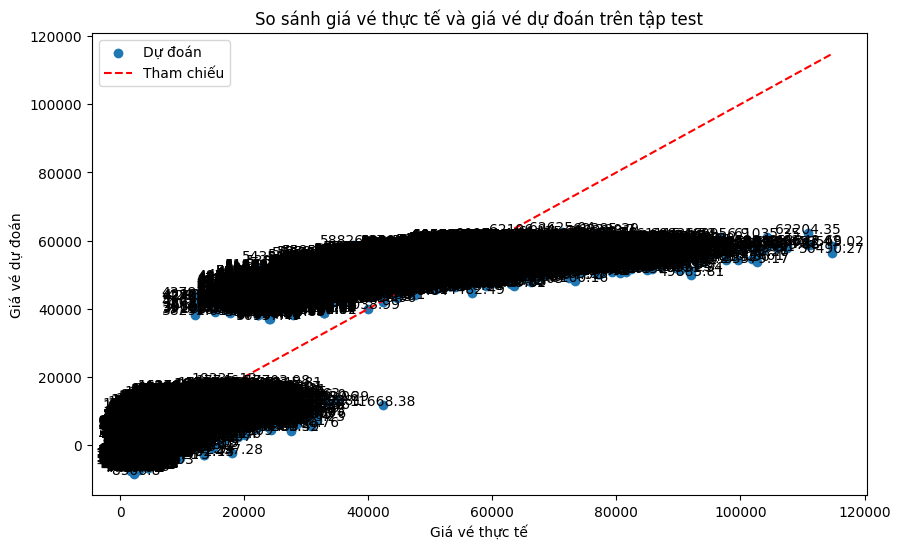

In [19]:
# Vẽ biểu đồ so sánh giá vé dự đoán và giá vé thực tế trên tập test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Dự đoán')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Tham chiếu')
plt.xlabel('Giá vé thực tế')
plt.ylabel('Giá vé dự đoán')
plt.title('So sánh giá vé thực tế và giá vé dự đoán trên tập test')
plt.legend()

# Hiển thị giá vé dự đoán
for i in range(len(y_pred)):
    plt.text(y_test[i], y_pred[i], str(round(y_pred[i], 2)), ha='center')

# Hiển thị biểu đồ
plt.show()

In [21]:
# Tạo danh sách giá vé dự đoán và giá vé thực tế tương ứng
predicted_prices = []
actual_prices = []

for i in range(len(y_pred)):
    predicted_prices.append(round(y_pred[i], 2))
    actual_prices.append(y_test[i])

# Hiển thị danh sách giá vé dự đoán và giá vé thực tế
print("Danh sách giá vé:")
for i in range(len(predicted_prices)):
    print(f"Giá vé {i+1}: Dự đoán: {predicted_prices[i]}, Thực tế: {actual_prices[i]}")


Danh sách giá vé:
Giá vé 1: Dự đoán: 10607.31, Thực tế: 10721
Giá vé 2: Dự đoán: 52898.88, Thực tế: 66928
Giá vé 3: Dự đoán: -236.56, Thực tế: 6909
Giá vé 4: Dự đoán: -4580.33, Thực tế: 2271
Giá vé 5: Dự đoán: 4116.66, Thực tế: 4363
Giá vé 6: Dự đoán: 5112.28, Thực tế: 4357
Giá vé 7: Dự đoán: 54345.94, Thực tế: 74981
Giá vé 8: Dự đoán: 50869.6, Thực tế: 79349
Giá vé 9: Dự đoán: -137.63, Thực tế: 4914
Giá vé 10: Dự đoán: 4156.95, Thực tế: 4020
Giá vé 11: Dự đoán: 48702.86, Thực tế: 47657
Giá vé 12: Dự đoán: 56061.77, Thực tế: 55983
Giá vé 13: Dự đoán: 49305.15, Thực tế: 52063
Giá vé 14: Dự đoán: 5676.37, Thực tế: 6395
Giá vé 15: Dự đoán: 7276.46, Thực tế: 9668
Giá vé 16: Dự đoán: 6450.08, Thực tế: 4028
Giá vé 17: Dự đoán: 4864.6, Thực tế: 5774
Giá vé 18: Dự đoán: 53659.25, Thực tế: 31682
Giá vé 19: Dự đoán: 50164.0, Thực tế: 42521
Giá vé 20: Dự đoán: 51792.4, Thực tế: 56588
Giá vé 21: Dự đoán: 49798.64, Thực tế: 44546
Giá vé 22: Dự đoán: 51787.43, Thực tế: 54777
Giá vé 23: Dự đoán: 9696